Problem 1) Take the Gapminder Test: http://forms.gapminder.org/s3/test-2018.
What score did you receive? Did any of the answers surprise you?
Choose a question from the test, re-state it, and answer it using visualization and summarization. Provide a
figure and any relevant output with your answer

Answering question "Where does the majority of the world population live?" and "There are roughly seven billion people in the world today. Which map shows where people live? (Each figure represents 1 billion people.)" using visualisation and the data provided.

In [1]:
import numpy as np
import folium
import pandas as pd
from matplotlib import cm, pyplot as plt
import seaborn as sns

In [2]:
#read tables
data_point_path = "ddf--gapminder--systema_globalis/ddf--datapoints--"
entity_path = "ddf--gapminder--systema_globalis/ddf--entities--"
population_table = pd.read_csv(data_point_path + "population_total--by--geo--time.csv")
country_table = pd.read_csv(entity_path + "geo--country.csv")

In [3]:
population_table = population_table.rename(columns={"geo": "country"})

In [4]:
data = pd.merge(population_table, country_table, on='country', how='left')
data.shape

(59297, 35)

In [5]:
data.head(2)

,country,time,population_total,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,...,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,afg,1800,3280000,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,...,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
1,afg,1801,3280000,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,...,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia


In [6]:
last_10_years = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

In [7]:
data = data[data["time"].isin(last_10_years)]

In [8]:
data = data[["country", "time", "latitude", "longitude", "name", "world_4region", "population_total"]]

In [9]:
data = data.groupby(["name"]).mean().reset_index()

In [10]:
data.head()

,name,time,latitude,longitude,population_total
0,Afghanistan,2014.0,33.00000,66.00000,3.265523e+07
1,Albania,2014.0,41.00000,20.00000,2.931117e+06
2,Algeria,2014.0,28.00000,3.00000,3.908213e+07
3,Andorra,2014.0,42.50779,1.52109,8.012627e+04
4,Angola,2014.0,-12.50000,18.50000,2.701554e+07


In [11]:
values = {'latitude': 0.0, 'longitude': 0.0}
data = data.fillna(value=values)

name = []
lat = []
lon = []
value = []

for i,row in data.iterrows():
    if row["latitude"] == np.nan or row["longitude"] == np.nan:
        print(row)
        continue
    name.append(row["name"])
    lat.append(row["latitude"])
    lon.append(row["longitude"])
    value.append(row["population_total"])

In [12]:
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lat':lat,
   'lon':lon,
   'name':name,
   'value':value
})
data
 
m = folium.Map(location=[24.0230491,40.569946], zoom_start=2)

print("Ans). Distribution of population per country (mean over last 10 years).\
\nAccording to the plot we see that the most populated country is China and India")
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['name'] + " " + str(int(data.iloc[i]['value'])) ,
      radius=int(data.iloc[i]['value'] / 1000),
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m

Ans). Distribution of population per country (mean over last 10 years).
According to the plot we see that the most populated country is China and India


Problem 2)
Visualize the distribution of income (GDP / capita) across countries and continents, and how the distribution
of income changes over time.
Interpret the visualization and what you notice. Are they any notable trends and/or deviations from that
trend?
What caveats apply to your conclusions?

Ans) If we look at the visualizations below we see that the income increases as time passes for almost all countries and all continents. Almost all countries have smooth rise over a year with only a few which have sharp spikes. Also, we see that Asia has a spike in around 1970s which then decreased and started following the curve similar to other continents. Also average income per person in africa is very less as compared to other continents.

In [13]:
#read tables
data_point_path = "ddf--gapminder--systema_globalis/ddf--datapoints--"
entity_path = "ddf--gapminder--systema_globalis/ddf--entities--"
gdp_table = pd.read_csv(data_point_path + "income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv")
country_table = pd.read_csv(entity_path + "geo--country.csv")

In [14]:
gdp_table = gdp_table.rename(columns={"geo": "country"})
gdp_table.head()

,country,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [15]:
country_table.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,...,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,...,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,...,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [16]:
raw = pd.merge(gdp_table, country_table, left_on=['country'], right_on=['country'], how='left')
raw = raw.rename(columns={"income_per_person_gdppercapita_ppp_inflation_adjusted": "Income", 
                          "time": "Year", 
                          "name": "Name",
                          "world_4region": "Continent"})

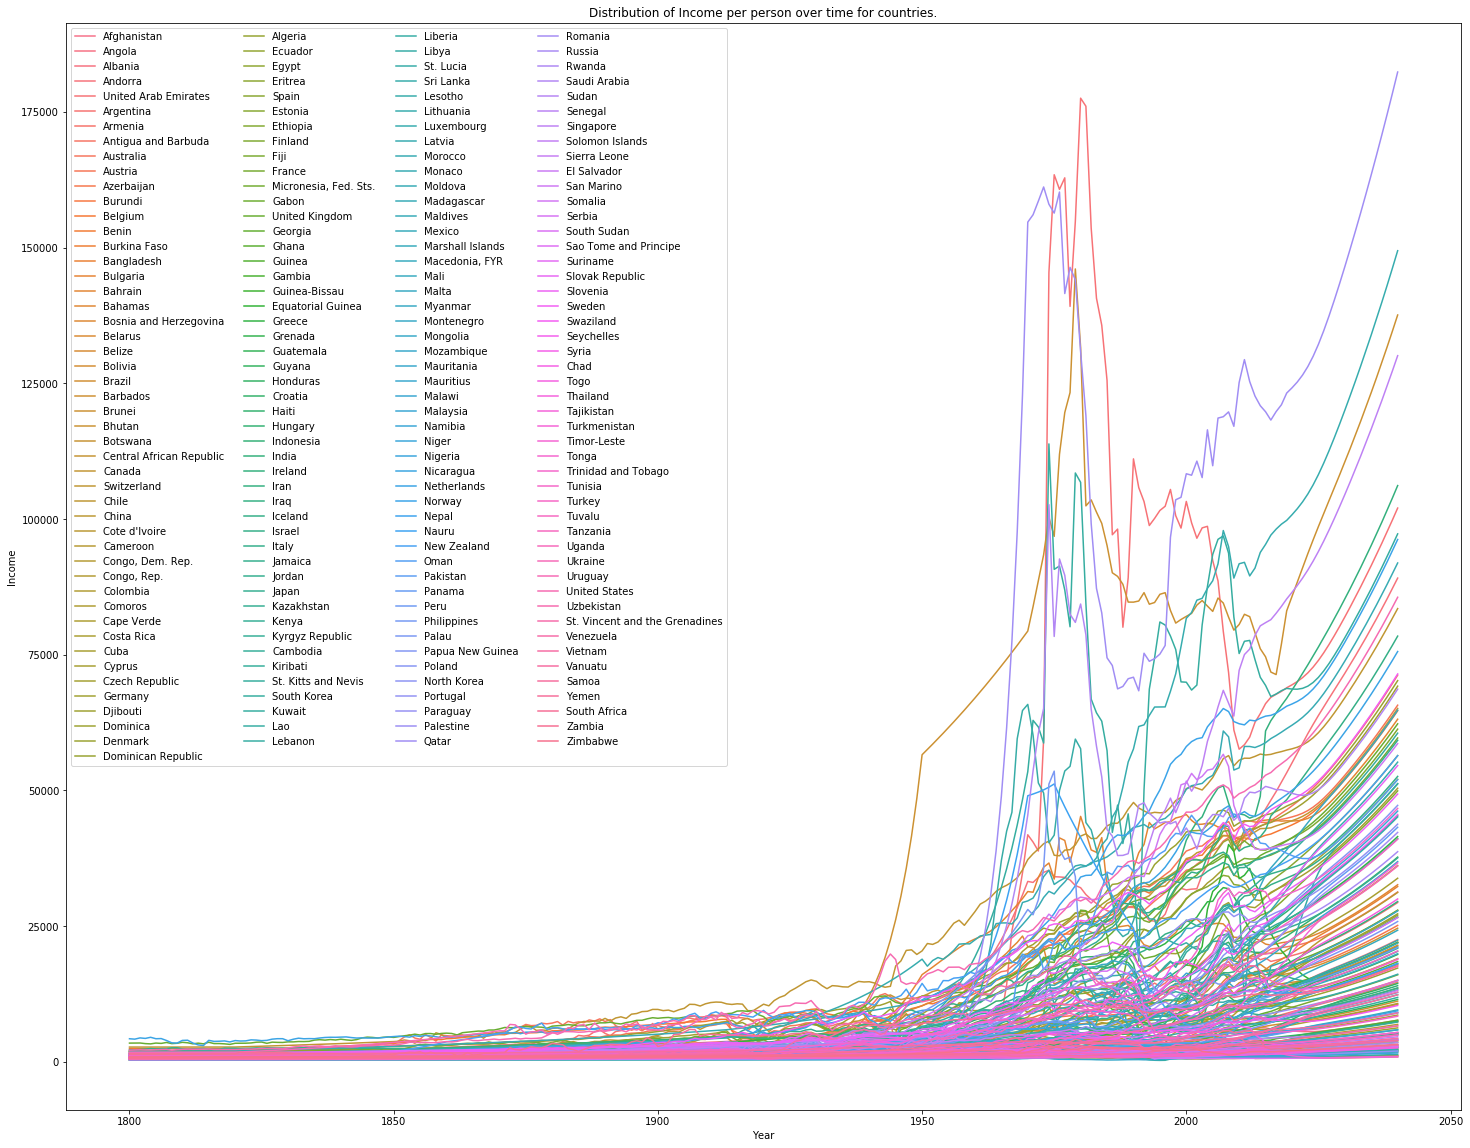

In [17]:
plt.rcParams["figure.figsize"] = (25,20)
ax = sns.lineplot(x="Year", y="Income", hue="Name", data=raw)
ax.title.set_text('Distribution of Income per person over time for countries.')
plt.legend(raw.Name.unique(), ncol=4, numpoints=1)
plt.show()

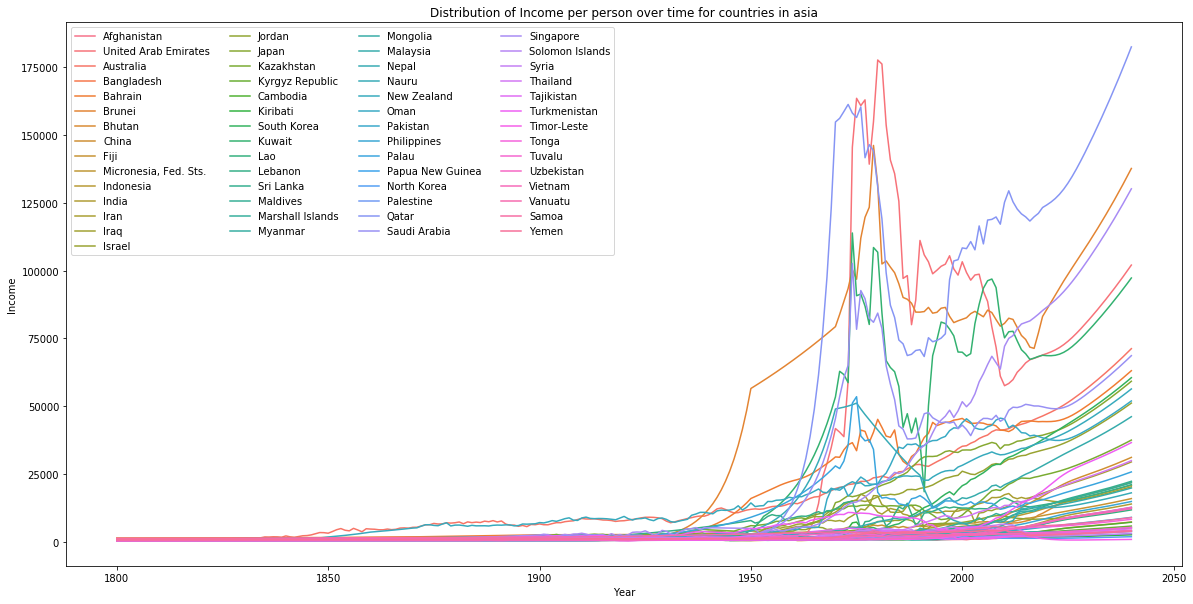

In [ ]:
for continent in raw["Continent"].unique():
    plt.rcParams["figure.figsize"] = (20,10)
    cnd = raw[raw["Continent"] == continent]
    ax = sns.lineplot(x="Year", y="Income", hue="Name", data=cnd)
    ax.title.set_text('Distribution of Income per person over time for countries in ' + str(continent))
    plt.legend(cnd.Name.unique(), ncol=4, numpoints=1)
    plt.show()

In [ ]:
continent_gdp = raw[["Year", "Continent", "Income"]].groupby(["Year", "Continent"]).mean().reset_index()
continent_gdp.head()
plt.rcParams["figure.figsize"] = (15,10)
ax = sns.lineplot(x="Year", y="Income", hue="Continent", data=continent_gdp)
ax.title.set_text('Distribution of Income per person over time for Continent.')
plt.show()



Problem 3)
Use visualization to investigate the relationship between income (GDP / capita), life expectancy, and child
mortality over time. How does each measure change over time within each continent?
Interpret your visualizations, noting any trends and/or outliers.

We can see in all the plots that for every continent the income increases over time with almost a smooth curve except for Asia. we also see that with the increase in income there is also an increase in life expectancy rate and decrease in child mortality rate. This trend basically means with the increase in income per person the quality of life people live becomes better. Also, around 1920s we see that there is a sharp downfall of life expectancy for all continent this may be because there might be no data for that time period or may be its just some outlier.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import cm, pyplot as plt
import seaborn as sns


In [ ]:
#read tables
data_point_path = "ddf--gapminder--systema_globalis/ddf--datapoints--"
entity_path = "ddf--gapminder--systema_globalis/ddf--entities--"
gdp_table = pd.read_csv(data_point_path + "income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv")
country_table = pd.read_csv(entity_path + "geo--country.csv")

In [ ]:
gdp_table = gdp_table.rename(columns={"geo": "country"})

In [ ]:
raw = pd.merge(gdp_table, country_table, on='country', how='left')
raw = raw.rename(columns={"income_per_person_gdppercapita_ppp_inflation_adjusted": "Income", 
                          "time": "Year", 
                          "name": "Name",
                          "world_4region": "Continent"})
raw.head(5)

In [ ]:
child_mortality = pd.read_csv(data_point_path +\
                              "child_mortality_0_5_year_olds_more_years_version_7--by--geo--time.csv")
child_mortality = child_mortality.rename(columns={"geo": "country",\
                            "child_mortality_0_5_year_olds_more_years_version_7" : "child_mortality"})
raw = pd.merge(raw, child_mortality,  how='left', left_on=['country','Year'], right_on = ['country','time'])
raw.head(2)

In [ ]:
life_expectancy = pd.read_csv(data_point_path +\
                              "life_expectancy_years--by--geo--time.csv")
life_expectancy = life_expectancy.rename(columns={"geo": "country",\
                            "time" : "Year"})
life_expectancy.head()
raw = pd.merge(raw, life_expectancy,  how='left', left_on=['country','Year'], right_on = ['country','Year'])
raw.head(2)


In [ ]:
continent_df = raw[["Year", "Continent", "Income", "child_mortality", "life_expectancy_years"]]\
    .groupby(["Year", "Continent"]).mean().reset_index()
continent_df.head()

In [ ]:
# [reference Link] : https://matplotlib.org/3.1.1/gallery/ticks_and_spines/multiple_yaxis_with_spines.html

for Continent in list(continent_df["Continent"].unique()):
    cdf = continent_df[continent_df["Continent"] == Continent]

    sns.set(rc={'figure.figsize':(15,5)})

    fig = plt.figure()
    host = fig.add_subplot(111)
    host.set_title("Plot of life expectancy, Child mortality and income per person for " + Continent)

    par1 = host.twinx()
    par2 = host.twinx()
    
    host.set_xlabel("Year")
    host.set_ylabel("Income")
    par1.set_ylabel("Child mortality")
    par2.set_ylabel("Life expectancy")
    
    p1, = host.plot(cdf["Year"], cdf["Income"], color="#0099ff",label="Income per person")
    p2, = par1.plot(cdf["Year"], cdf["child_mortality"], color="#33cc33", label="Child mortality")
    p3, = par2.plot(cdf["Year"], cdf["life_expectancy_years"], color="#ffa31a", label="Life expectancy")

    lns = [p1, p2, p3]
    host.legend(handles=lns, loc='lower left')
    par2.spines['right'].set_position(('outward', 80))
    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

    plt.show()

Problem 4)
Choose two variables you have not investigated yet, and visualize their distributions, their relationship with
each other, and how these change over time.
Interpret your visualizations, noting any trends and/or outliers.

Ans) For this question i have decided to visualize the suicide rate for every continent over time. We can see that the number of suicide is highest in Asia. This may be because of the fact that Asia is the most populated continent. We also see that for every continent the population is almost increasing and with the increase suicides are also increasing but interestingly the rate of suicides in the American continent is increasing as opposed to other continents where it is decreasing. Although the suicide rate of the American continent is significantly low as compared to Asia and Europe.

In [ ]:
#read tables
data_point_path = "ddf--gapminder--systema_globalis/ddf--datapoints--"
entity_path = "ddf--gapminder--systema_globalis/ddf--entities--"

suicide_table = pd.read_csv(data_point_path + "suicide_total_deaths--by--geo--time.csv")
population_table = pd.read_csv(data_point_path + "population_total--by--geo--time.csv")
country_table = pd.read_csv(entity_path + "geo--country.csv")

In [ ]:
suicide_table = suicide_table.rename(columns={"geo": "country"})
population_table = population_table.rename(columns={"geo": "country"})

In [ ]:
raw = pd.merge(suicide_table, population_table,left_on=["country", "time"],\
               right_on=["country", "time"], how='left')


In [ ]:
raw = pd.merge(raw, country_table, left_on=["country"],\
               right_on=["country"], how='left')
raw = raw[["country", "name", "world_4region", "time", "suicide_total_deaths", "population_total"]]
raw = raw.rename(columns={ "time": "Year", 
                           "name": "Name",
                           "world_4region": "Continent"})

raw.head()

In [ ]:
continent_df = raw[["Year", "Continent", "suicide_total_deaths", "population_total"]]\
    .groupby(["Year", "Continent"]).sum().reset_index()
continent_df.head()
continent_df["sucide_rate"] = 100 * (continent_df["suicide_total_deaths"] / continent_df["population_total"])

In [ ]:
continent_df.head()

In [ ]:
# [reference Link] : https://matplotlib.org/3.1.1/gallery/ticks_and_spines/multiple_yaxis_with_spines.html

for Continent in list(continent_df["Continent"].unique()):
    cdf = continent_df[continent_df["Continent"] == Continent]

    sns.set(rc={'figure.figsize':(15,5)})

    fig = plt.figure()
    host = fig.add_subplot(111)
    host.set_title(Continent)
    host.get_yaxis().get_major_formatter().set_scientific(False)

    par1 = host.twinx()
    par2 = host.twinx()
    
    host.set_xlabel("Year")
    host.set_ylabel("population_total")
    par1.set_ylabel("suicide_total_deaths")
    par2.set_ylabel("sucide_rate")
    
    p1, = host.plot(cdf["Year"], cdf["population_total"], color="#0099ff",label="Population")
    p2, = par1.plot(cdf["Year"], cdf["suicide_total_deaths"], color="#33cc33", label="Suicide Total")
    p3, = par2.plot(cdf["Year"], cdf["sucide_rate"], color="#ffa31a", label="Suicide Rate")

    lns = [p1, p2, p3]
    host.legend(handles=lns, loc='lower left')
    par2.spines['right'].set_position(('outward', 80))
    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

    plt.show()